
##   Hand gesture Classification using SVM





### Convert the image into binary image

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
import codecs
import json
import cv2
import pandas as pd 

print(os.listdir("Lab0609"))
path='Lab0609'
folders=os.listdir(path)
folders=set(folders)


different_classes=os.listdir(path)
different_classes=set(different_classes)


print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
The different classes that exist in this dataset are:
{'F', 'G', 'E', 'H', 'J', 'C', 'B', 'D', 'A', 'I'}


###  Extract features from these and store them in a csv file (features should be chosen by you - eg. binary pixel vectors, total number of white pixels, local binary patterns). Represent each image using such features

In [5]:


x=[]
z=[]
y=[]

#converting the image to black and white and making class labels to 0,1,2,,, from A,B,c...

threshold=200


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for k in subdir:
        results=dict()
        results['y']=ord(i)-65
        img = cv2.imread(subject+'/'+k,0)
        img=cv2.resize(img,(int(160),int(60)))  # resizing image to decrease space complexity
            
        ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        imgD=np.asarray(img,dtype=np.float64)
        z.append(imgD)
        imgf=np.asarray(imgf,dtype=np.float64)
        x.append(imgf)
        y.append(ord(i)-65)
                 
        results['x']=imgf

print(list(set(y)))    

        
# writing features to csv file.

df=pd.DataFrame({'x':x,'y':y})
df.to_csv('results.csv',index=False)

*** F ***
*** G ***
*** E ***
*** H ***
*** J ***
*** C ***
*** B ***
*** D ***
*** A ***
*** I ***
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Class Label: 1


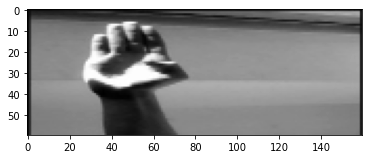

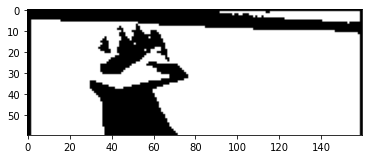

Class Label: 2


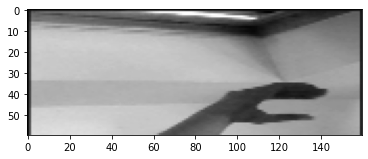

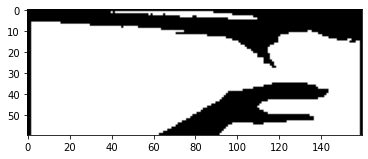

Class Label: 3


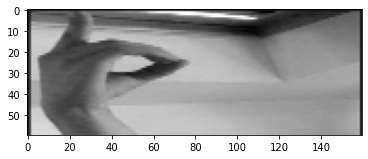

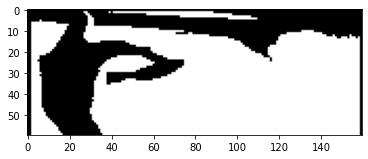

Class Label: 4


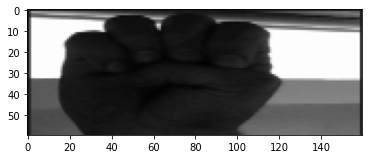

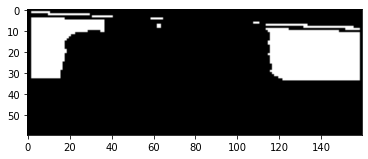

Class Label: 5


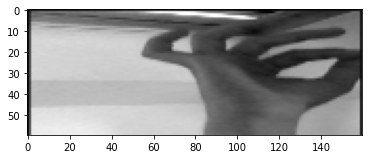

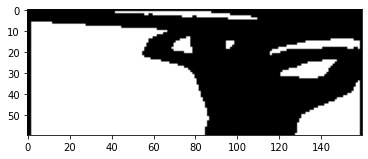

Class Label: 6


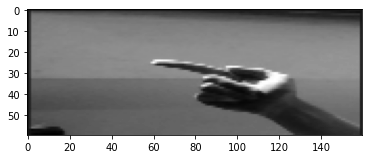

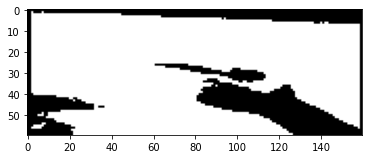

Class Label: 7


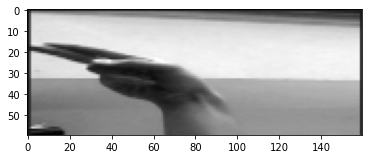

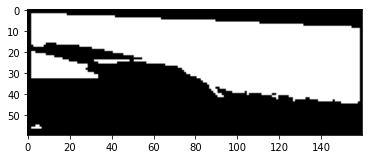

Class Label: 8


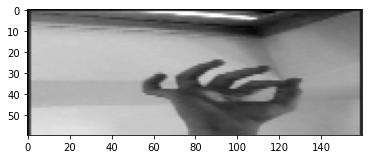

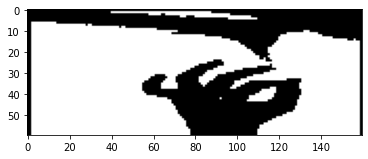

Class Label: 9


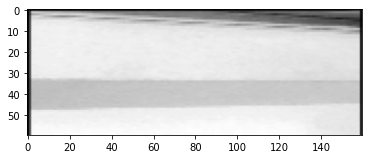

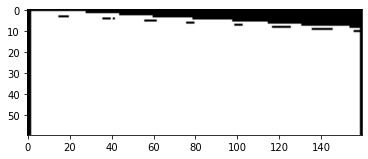

Class Label: 10


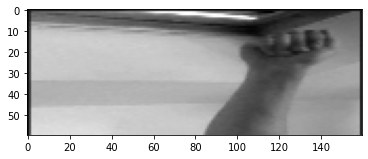

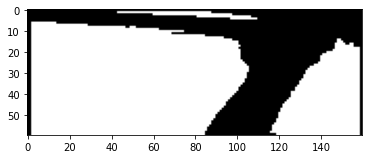

In [6]:
#sample/displaying  black and white image from each class
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show()
    
    

In [7]:
# converting to numpy array after binarization
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(30000, 60, 160)
(30000, 1)
[9] [0]


In [8]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

### PCA to the data(Reducing data dimension to decrease load)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x_data=np.array(x_data)
x_data=pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[0.26269779 0.1787963  0.0889634  0.06629648]
[3922.70791124 3236.21247865 2282.77682316 1970.62045071]


### From each class in the dataset use 70% for training and 30% for testing.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.3)


from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_further)

###  Use the features for classification using SVM (default setting). Print classification report

In [13]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svm_model = SVC().fit(X_train, y_train) 
y_pred_svm=svm_model.predict(X_test)
y_train_score_svm=svm_model.predict(X_train)


print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_svm, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_svm, normalize=True, sample_weight=None))
print("\n")
print(classification_report(y_further, y_pred_svm)) 

C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy of the model is:
Test  0.5134444444444445
Train 0.5226666666666666


              precision    recall  f1-score   support

           0       0.39      0.38      0.38       908
           1       0.49      0.53      0.51       921
           2       0.59      0.67      0.63       890
           3       0.38      0.48      0.42       857
           4       0.50      0.33      0.40       940
           5       0.46      0.39      0.42       881
           6       0.56      0.40      0.47       869
           7       0.51      0.51      0.51       908
           8       0.39      0.50      0.44       925
           9       0.92      0.94      0.93       901

    accuracy                           0.51      9000
   macro avg       0.52      0.51      0.51      9000
weighted avg       0.52      0.51      0.51      9000



###  Apply grid search for hyper-parameter tuning.(eg: kernel, C, gamma)

In [16]:
from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [10,100],  
              'gamma': [ 1, 0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4) 

grid.fit(X_train, y_train) 

# using C as 0.1, 1 and gamma as 0.01 and 0.001 , the accuracy was too low.

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10, gamma=1, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.693, total=  16.0s
[CV] C=10, gamma=1, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s
C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.700, total=  15.1s
[CV] C=10, gamma=1, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.0s remaining:    0.0s
C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.704, total=  14.9s
[CV] C=10, gamma=1, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   45.9s remaining:    0.0s
C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.700, total=  15.4s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.702, total=  14.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.357, total=  28.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.366, total=  29.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.353, total=  28.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.345, total=  28.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.363, total=  19.6s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.781, total=  13.5s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.792, total=  13.5s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.798, total=  13.6s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.796, total=  13.6s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.787, total=  13.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.405, total=  20.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.408, total=  20.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.409, total=  20.7s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.395, total=  21.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.414, total=  20.9s


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.4min finished
C:\Users\DEBJYOTI\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100], 'gamma': [1, 0.01], 'kernel': ['rbf']},
             verbose=4)

### Report the model with best accuracy

In [17]:
# print best parameter after tuning and print how our model looks after hyper-parameter tuning 
print(grid.best_params_) 
print(grid.best_estimator_) 


grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_further, grid_predictions)) 

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       908
           1       0.77      0.83      0.80       921
           2       0.87      0.88      0.87       890
           3       0.70      0.78      0.74       857
           4       0.77      0.70      0.73       940
           5       0.77      0.75      0.76       881
           6       0.88      0.80      0.84       869
           7       0.86      0.84      0.85       908
           8       0.76      0.76      0.76       925
           9       1.00      1.00      1.00       901

    accuracy                           0.81      9000
   macro avg       0.81      0.81      0.81      9000
weighted avg       0.81      0.81      0.81      9000



##  Got almost 81 % prediction result using parameters using hyperparameter tuning C:100, gamma :1 and kernel='rbf' , much better than original SVM classifier which gave around 51% prediction accuracy.



